# Data RS Aletsch

In [87]:
from obspy import read, UTCDateTime
from obspy.io.xseed import Parser
from obspy import read_inventory
from obspy.signal import PPSD
import matplotlib.pylab as plt

In [88]:
st = read("CATZ.mseed")
print(st)

1 Trace(s) in Stream:
AM.RE682.00.SHZ | 2018-03-01T00:00:02.466999Z - 2018-03-02T00:00:08.786999Z | 50.0 Hz, 4320317 samples


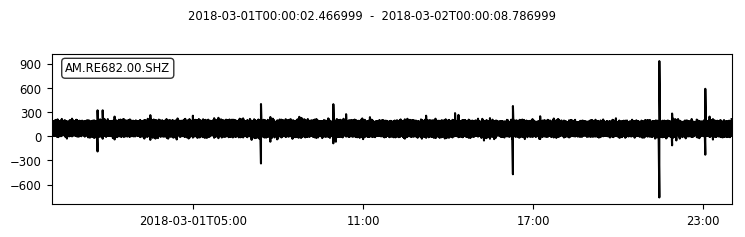

In [89]:
st.plot()

In [90]:
len(st)
tr=st[0] #assign fisrt and only trace to new variable
print(tr)

AM.RE682.00.SHZ | 2018-03-01T00:00:02.466999Z - 2018-03-02T00:00:08.786999Z | 50.0 Hz, 4320317 samples


In [91]:
print(tr.stats)

         network: AM
         station: RE682
        location: 00
         channel: SHZ
       starttime: 2018-03-01T00:00:02.466999Z
         endtime: 2018-03-02T00:00:08.786999Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 4320317
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6790, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3476480})


In [95]:
inv = read_inventory("RS1D-V6-RACOTECH-generic.xml")
print(inv)
# non riesce a leggere info in file di risposta RS

/Users/veliooo/anaconda3/lib/python3.6/site-packages/obspy/io/stationxml/core.py:271: UserWarning: 'b'<longitude xmlns="http://geofon.gfz-potsdam.de/ns/seiscomp3-schema/0.8">@STNLON@</longitude>\n        '' could not be converted to a float. Will be skipped. Please contact to report this issue.
  UserWarning)
/Users/veliooo/anaconda3/lib/python3.6/site-packages/obspy/io/stationxml/core.py:271: UserWarning: 'b'<latitude xmlns="http://geofon.gfz-potsdam.de/ns/seiscomp3-schema/0.8">@STNLAT@</latitude>\n        '' could not be converted to a float. Will be skipped. Please contact to report this issue.
  UserWarning)
/Users/veliooo/anaconda3/lib/python3.6/site-packages/obspy/io/stationxml/core.py:271: UserWarning: 'b'<elevation xmlns="http://geofon.gfz-potsdam.de/ns/seiscomp3-schema/0.8">@STNELEV@</elevation>\n        '' could not be converted to a float. Will be skipped. Please contact to report this issue.
  UserWarning)


TypeError: float() argument must be a string or a number, not 'NoneType'

In [96]:
ppsd = PPSD(tr.stats, metadata=inv)

In [59]:
net=inv[0]
net
sta=net[0]
sta
# non c'è info sul canale!

Station RDF14 (Raspberry Shake Personal Seismograph Station)
	Station Code: RDF14
	Channel Count: None/None (Selected/Total)
	2016-11-01T00:00:00.000000Z - 
	Access: closed 
	Latitude: 49.00, Longitude: 11.98, Elevation: 433.0 m
	Available Channels:


In [44]:
ppsd.add(st)

/Users/veliooo/anaconda3/lib/python3.6/site-packages/obspy/signal/spectral_estimation.py:811: UserWarning: Error getting response from provided metadata:
Exception: No matching response information found.
Skipping time segment(s).
  warnings.warn(msg)


False

In [80]:
paz = {'gain': 0.00149803,
       'poles': [-4.21+0j, -2.33+0j, -1.29+0j],
       'sensitivity': 469087000.0,
       'zeros': [-675+0j,0,0,0]}
# valore corretto 'zeros' = -675, il valore di sensitivity va in 'gain' (vedi manuale obspy)

In [ ]:
paz = {'gain': 1.0,
       'poles': [-4.21+0j, -2.33+0j, -1.29+0j],
       'sensitivity': 702706.0,
       'zeros': [-675+0j,0,0,0]}
# sensitivity normalizzata!

In [81]:
ppsd = PPSD(tr.stats, paz)

In [82]:
print(ppsd.id)
print(ppsd.times_processed)

AM.RE682.00.SHZ
[]


In [83]:
ppsd.add(st)

True

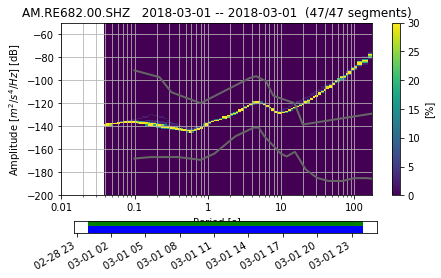

In [84]:
ppsd.plot()

In [85]:
ppsd.plot("CATZ_v5.png") 